In [87]:
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/djiko/Documents/ESME/Ingé2/Projet Clustering/ISCXURL2016/FinalDataset/All_BestFirst.csv")



In [88]:
df.info()
# Replacing infinite with nan
df.replace([np.inf, -np.inf], inplace=True)
# Dropping all the rows with nan values
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36694 entries, 0 to 36693
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   domain_token_count           36694 non-null  int64  
 1   executable                   36694 non-null  int64  
 2   NumberofDotsinURL            36694 non-null  int64  
 3   Arguments_LongestWordLength  36694 non-null  int64  
 4   NumberRate_Domain            36694 non-null  float64
 5   NumberRate_FileName          36694 non-null  float64
 6   NumberRate_AfterPath         36694 non-null  float64
 7   Entropy_Domain               36694 non-null  float64
 8   class                        36694 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 2.5+ MB


In [97]:
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

In [94]:
from sklearn.cluster import SpectralBiclustering, SpectralCoclustering
from numpy import argsort
from matplotlib.pyplot import show, imshow, figure, subplot, suptitle, tight_layout, xticks, xlabel

def pipeline(n, input_df):
    
    cocluster = SpectralCoclustering(n_clusters = n)
    cocluster.fit(input_df.values)
    cocluster_fit_data = input_df.values[argsort(cocluster.row_labels_)]
    cocluster_fit_data = cocluster_fit_data[:, argsort(cocluster.column_labels_)]
    
    bicluster = SpectralBiclustering(n_clusters = n)
    bicluster.fit(input_df.values)
    bicluster_fit_data = input_df.values[argsort(bicluster.row_labels_)]
    bicluster_fit_data = bicluster_fit_data[:, argsort(bicluster.column_labels_)]

    figure(figsize=(16,25))
    #suptitle("Mushrooms\n" + "n_clusters = " + str(n),fontsize=32, fontweight='bold')
    
    left_plot = subplot(211)
    ax = imshow(bicluster_fit_data, aspect='auto', cmap="bone")
    #xticks(range(0,len(input_df.columns)), list(input_df.columns[bicluster.column_labels_]),rotation='vertical')
    xlabel("Biclustering")
    
    right_plot = subplot(212)
    ax = imshow(cocluster_fit_data, aspect='auto', cmap="bone")
    #xticks(range(0,len(input_df.columns)), list(input_df.columns[cocluster.column_labels_]),rotation='vertical')
    xlabel("Coclustering")
    
    tight_layout()
    
    show()

In [75]:
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import normalize, scale
target = "URL_Type_obf_Type"
features = [feature for feature in df.columns if feature != target]
X=df.drop(target,axis=1)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [89]:
df = df.replace('Defacement', 1)
df = df.replace('benign', 0)
df = df.replace('malware', 2)
df = df.replace('phishing', 3)
df = df.replace('spam', 4)

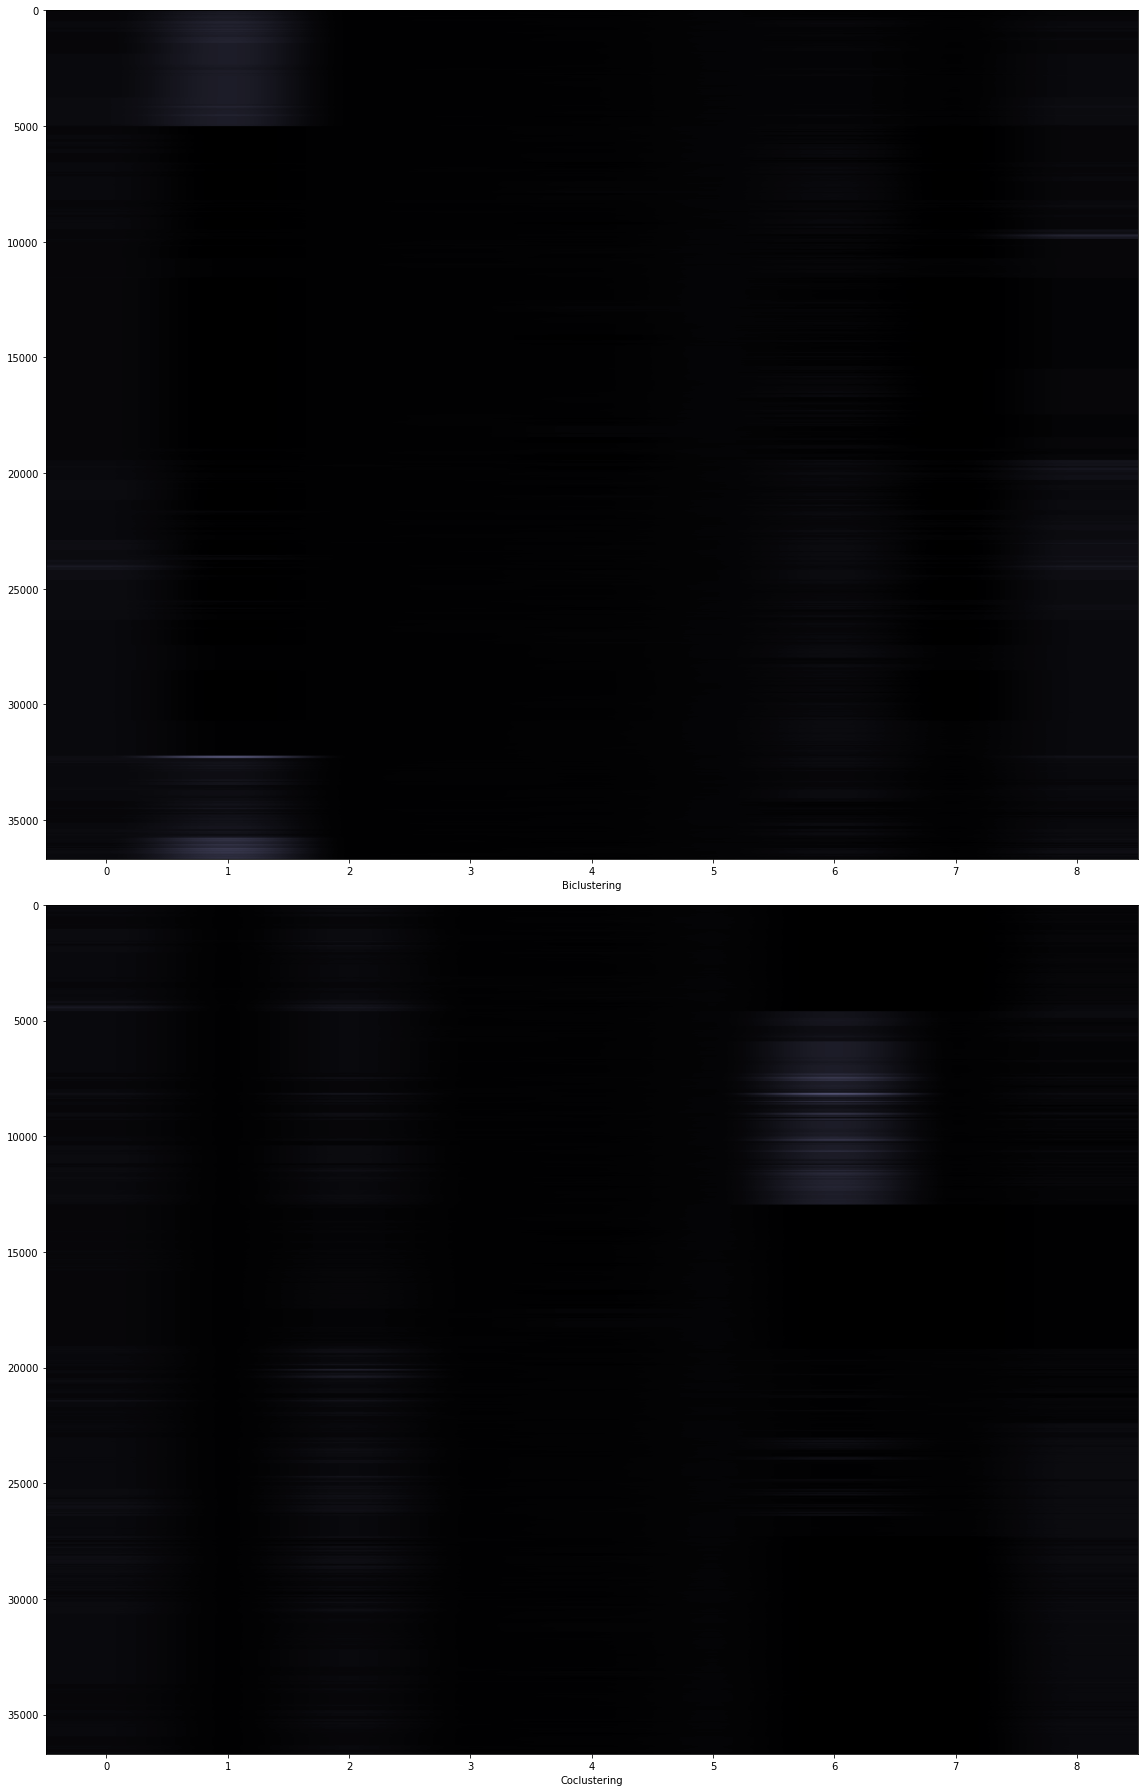

In [98]:
pipeline(6,df)
